In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub


c:\Users\max3l\Documents\seng474\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1. Loading and Exploring the Dataset
For this project, we are using the Credit Risk Benchmark dataset, which contains financial information to be used later to predict whether a borrower will default or not

In [25]:
""" Download the dataset for kaggle and print the first 5 rows """
path = kagglehub.dataset_download("adilshamim8/credit-risk-benchmark-dataset")

if os.path.exists(path):
  print("Path to dataset files:", os.listdir(path))
else:
  print("File does not exist")

df = pd.read_csv(os.path.join(path, "Credit Risk Benchmark Dataset.csv"))
print(df.head())



Path to dataset files: ['Credit Risk Benchmark Dataset.csv']
   rev_util   age  late_30_59  debt_ratio  monthly_inc  open_credit  late_90  \
0  0.006999  38.0         0.0    0.302150       5440.0          4.0      0.0   
1  0.704592  63.0         0.0    0.471441       8000.0          9.0      0.0   
2  0.063113  57.0         0.0    0.068586       5000.0         17.0      0.0   
3  0.368397  68.0         0.0    0.296273       6250.0         16.0      0.0   
4  1.000000  34.0         1.0    0.000000       3500.0          0.0      0.0   

   real_estate  late_60_89  dependents  dlq_2yrs  
0          1.0         0.0         3.0         0  
1          1.0         0.0         0.0         0  
2          0.0         0.0         0.0         0  
3          2.0         0.0         0.0         0  
4          0.0         0.0         1.0         0  


## 2. Data Exploration
To see trends and correlation, whether there are unique or interesting trends amongst the data provided

In [32]:
print(df.info())
print(df.describe())

missing_values = df.isnull().sum().sort_values(ascending=False)
print("Missing values: ", missing_values[missing_values > 0])

# Check for duplicates
duplicates = df.duplicated().sum()
print("Duplicates: ", duplicates)

y=df["dlq_2yrs"]
y.value_counts(normalize=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16714 entries, 0 to 16713
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rev_util     16714 non-null  float64
 1   age          16714 non-null  float64
 2   late_30_59   16714 non-null  float64
 3   debt_ratio   16714 non-null  float64
 4   monthly_inc  16714 non-null  float64
 5   open_credit  16714 non-null  float64
 6   late_90      16714 non-null  float64
 7   real_estate  16714 non-null  float64
 8   late_60_89   16714 non-null  float64
 9   dependents   16714 non-null  float64
 10  dlq_2yrs     16714 non-null  float64
dtypes: float64(11)
memory usage: 1.4 MB
None
           rev_util           age    late_30_59    debt_ratio    monthly_inc  \
count  16714.000000  16714.000000  16714.000000  16714.000000   16714.000000   
mean       4.799862     48.798672      1.110267     30.980298    6118.120258   
std      204.062345     13.906078      7.172890    719.6948

dlq_2yrs
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64

NOTE: 
  - From the observation above, we observe that there are no missing values, there exists 2 duplicate items, adn that the dql class is evenly distributed.


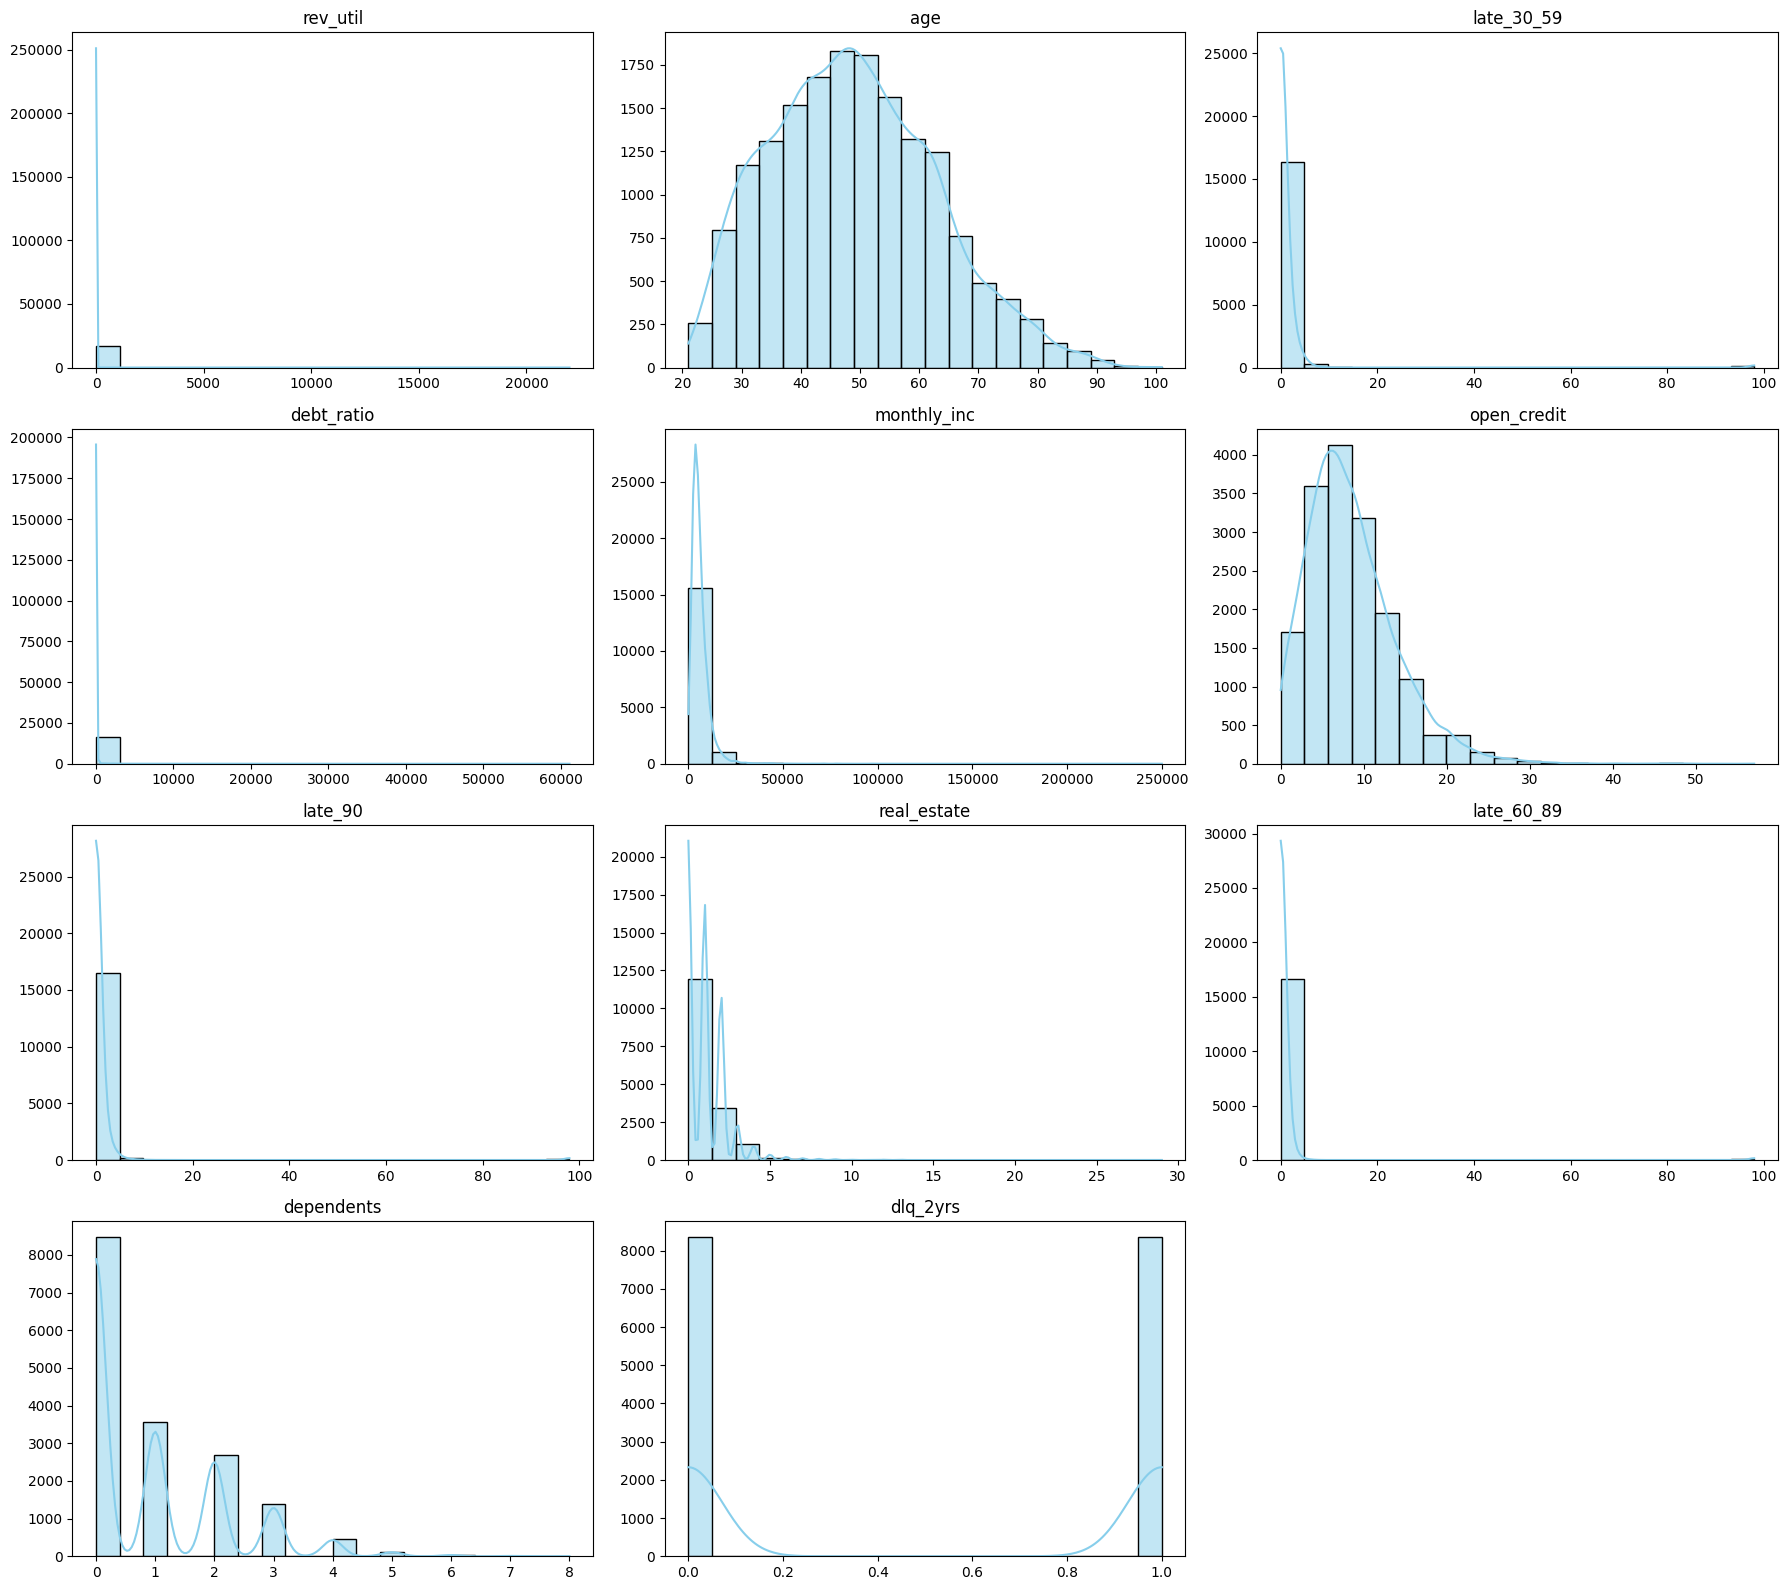

In [43]:
numeric_cols = df.select_dtypes(include="number").columns
n_cols = 3  
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], bins=20, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

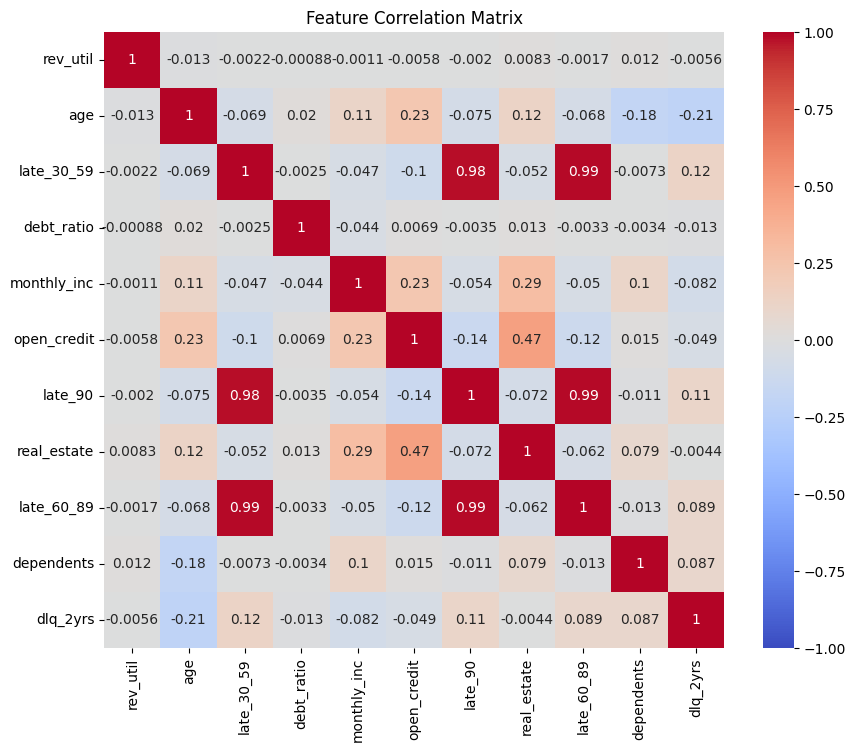

In [36]:
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, vmin=-1, vmax=1)
plt.title("Feature Correlation Matrix")
plt.show()

##### May need to combine the late_* payments cus they're highly correlated to avoid multicollinearity for regression models

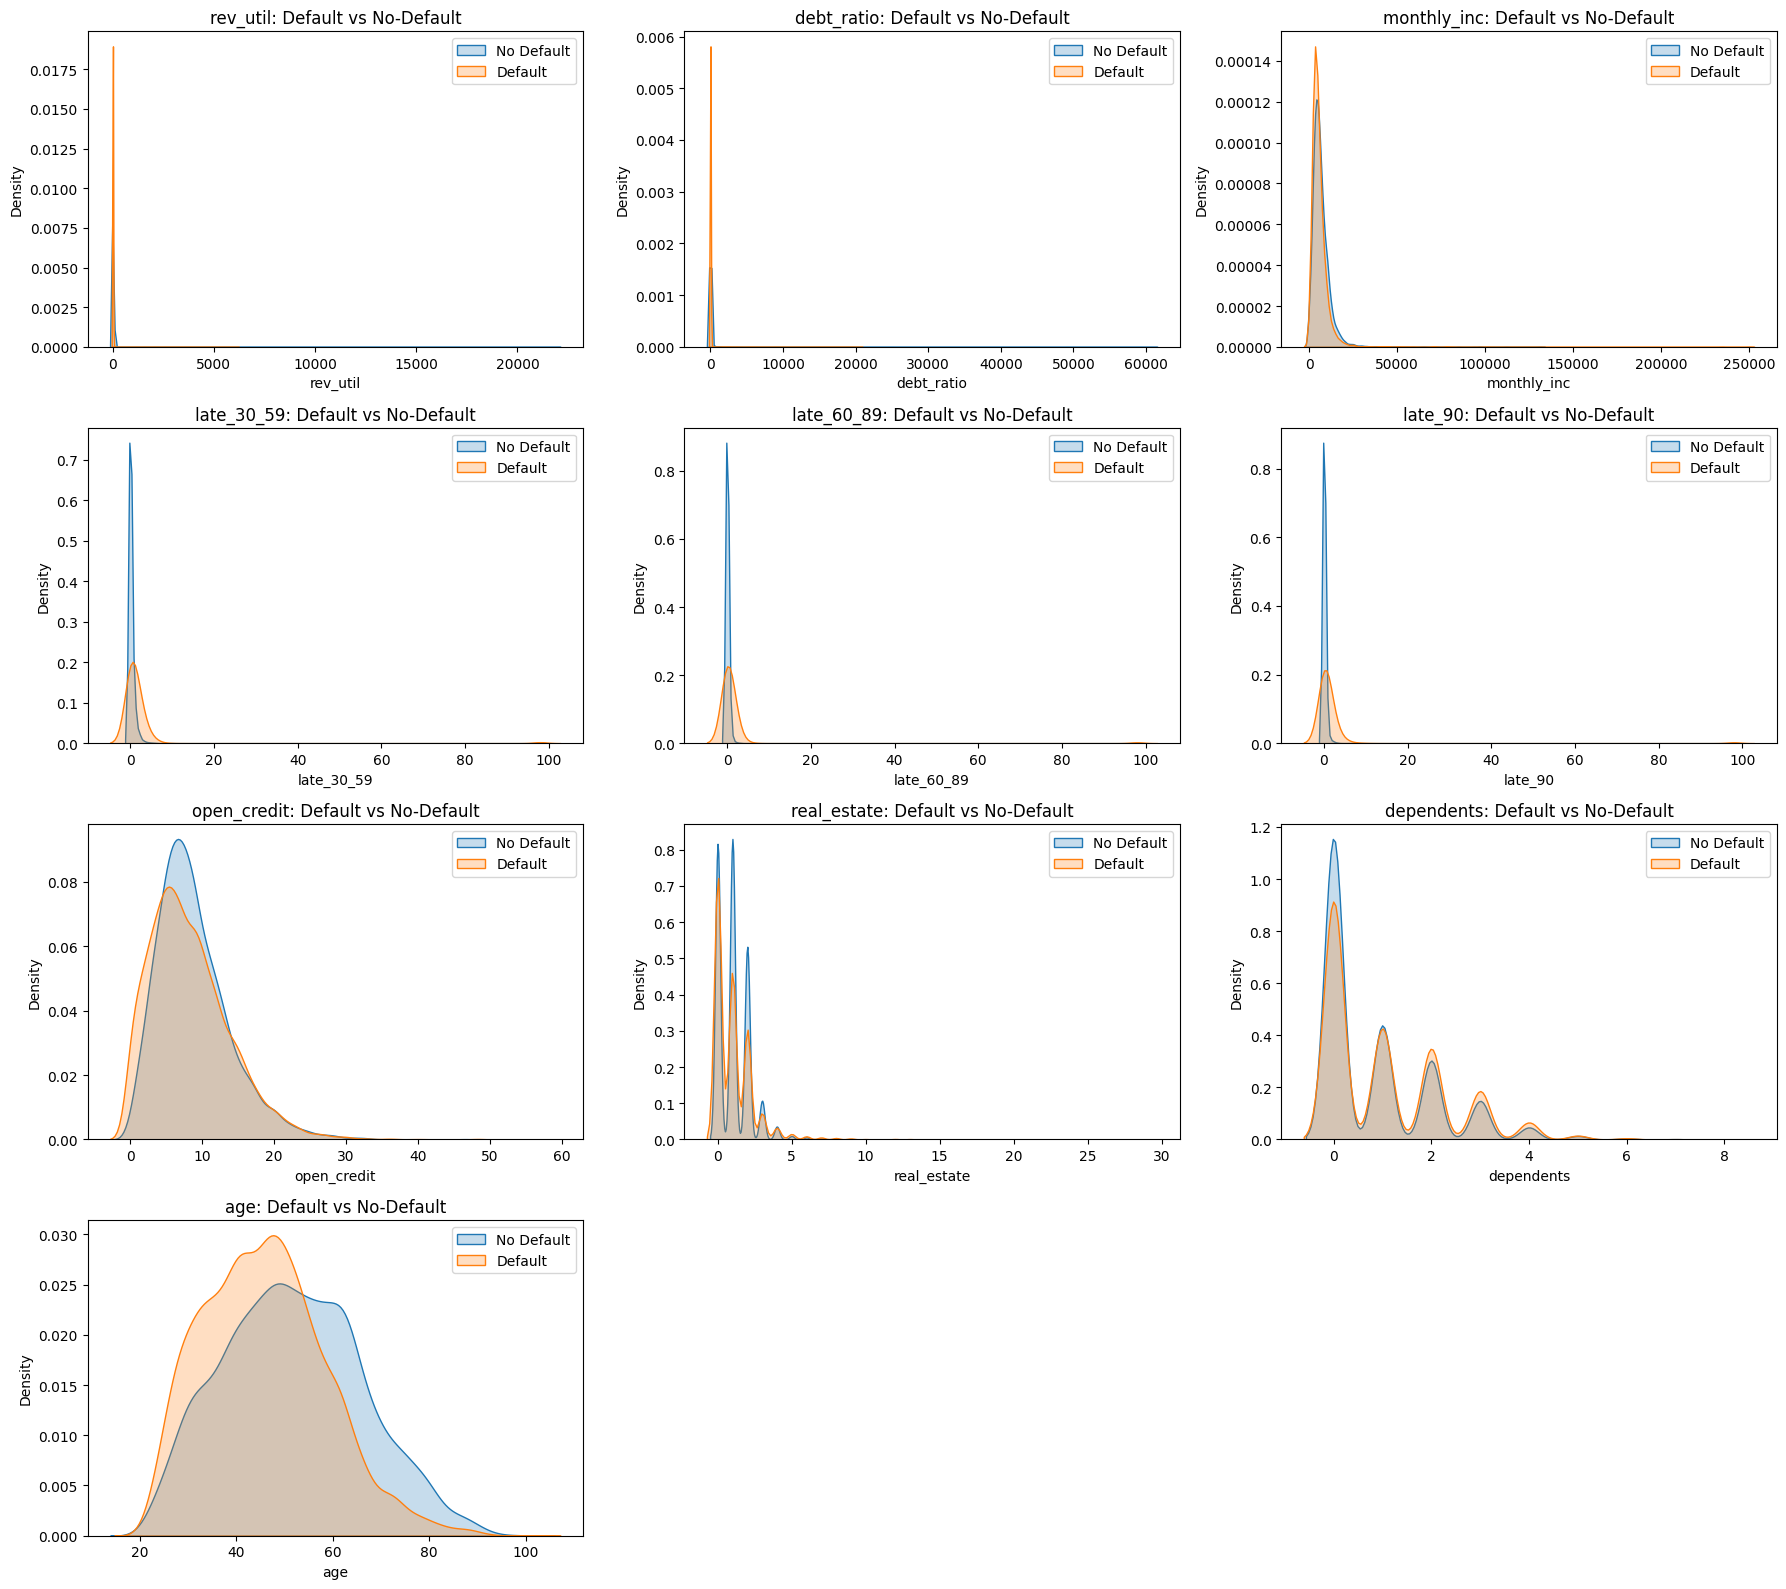

In [ ]:

features = ["rev_util", "debt_ratio", "monthly_inc",
            "late_30_59", "late_60_89", "late_90",
            "open_credit", "real_estate", "dependents", "age"]

n_cols = 3
n_rows = int(np.ceil(len(features) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.kdeplot(df[df.dlq_2yrs == 0][col], label="No Default", fill=True, ax=axes[i])
    sns.kdeplot(df[df.dlq_2yrs == 1][col], label="Default", fill=True, ax=axes[i])
    axes[i].set_title(f"{col}: Default vs No-Default")
    axes[i].legend()

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

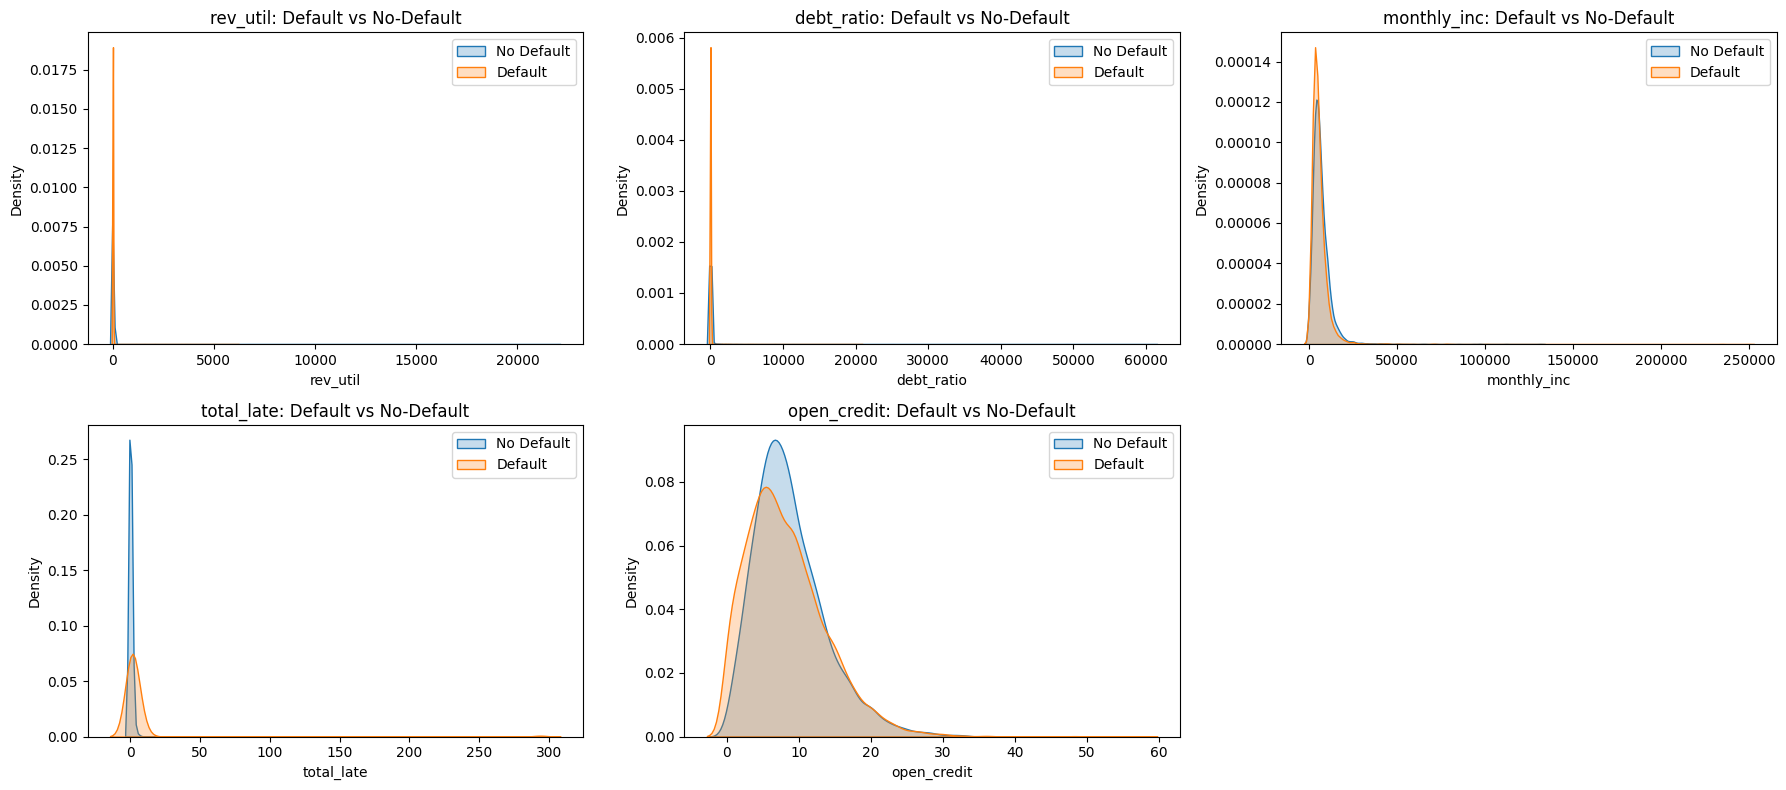

In [ ]:
df["total_late"] = df["late_30_59"] + df["late_60_89"] + df["late_90"]

features = ["rev_util", "debt_ratio", "monthly_inc", "total_late", "open_credit"]

n_cols = 3
n_rows = int(np.ceil(len(features) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.kdeplot(df[df.dlq_2yrs == 0][col], label="No Default", fill=True, ax=axes[i])
    sns.kdeplot(df[df.dlq_2yrs == 1][col], label="Default", fill=True, ax=axes[i])
    axes[i].set_title(f"{col}: Default vs No-Default")
    axes[i].legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

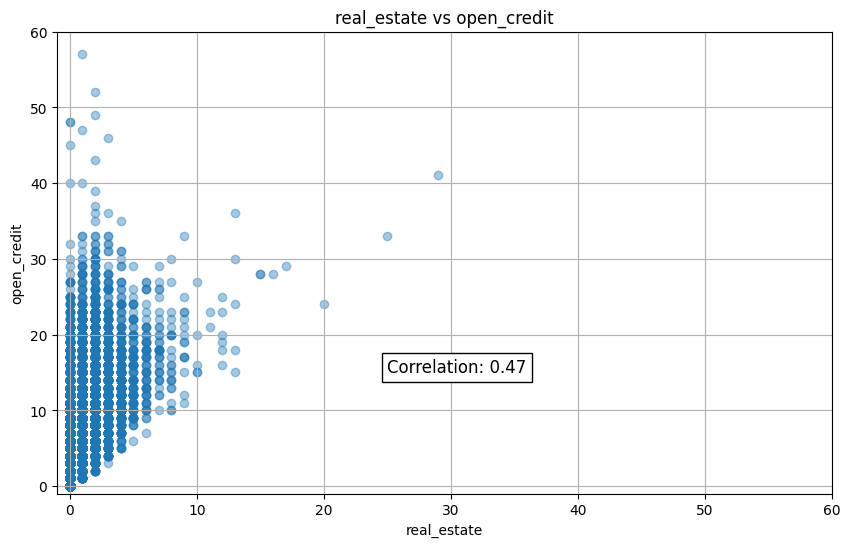

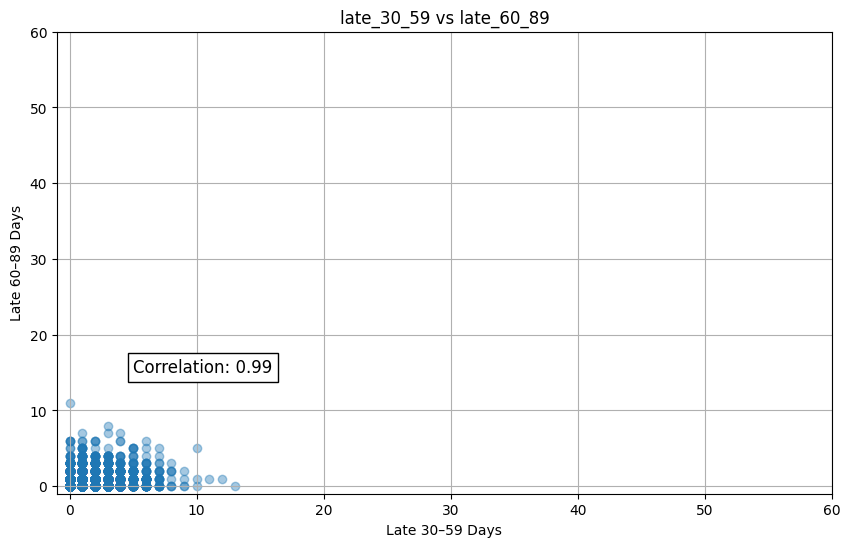

In [60]:
# real_estate vs open_credit
plt.figure(figsize=(10, 6))
plt.scatter(df["real_estate"], df["open_credit"], alpha=0.4)
plt.xlabel("real_estate")
plt.ylabel("open_credit")
plt.title("real_estate vs open_credit")

corr = df["real_estate"].corr(df["open_credit"])
plt.text(25, 15, f"Correlation: {corr:.2f}", fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))
plt.xlim(-1, 60)
plt.ylim(-1, 60)
plt.grid(True)
plt.show()

# late_30_59 vs late_60_89
plt.figure(figsize=(10, 6))
plt.scatter(df["late_30_59"], df["late_60_89"], alpha=0.4)
plt.xlabel("Late 30–59 Days")
plt.ylabel("Late 60–89 Days")
plt.title("late_30_59 vs late_60_89")

corr = df["late_30_59"].corr(df["late_60_89"])
plt.text(5, 15, f"Correlation: {corr:.2f}", fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))
plt.xlim(-1, 60)
plt.ylim(-1, 60)
plt.grid(True)
plt.show()


### Feature Engineering


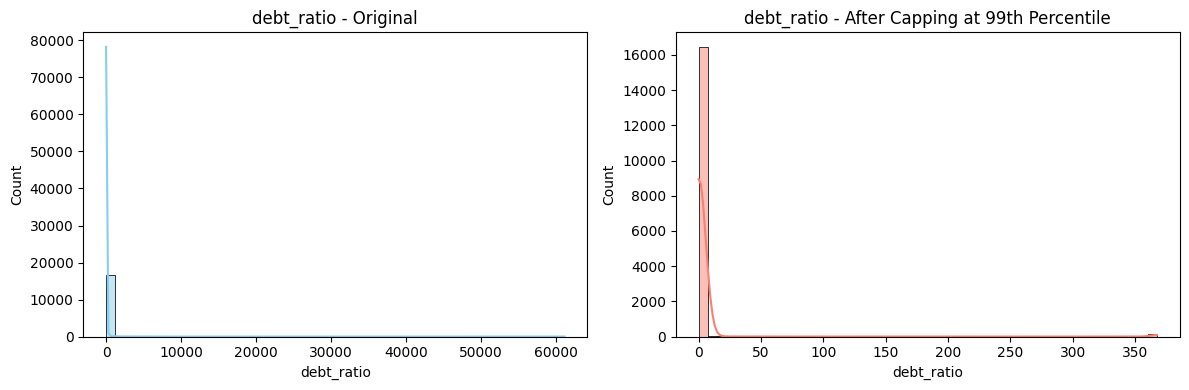

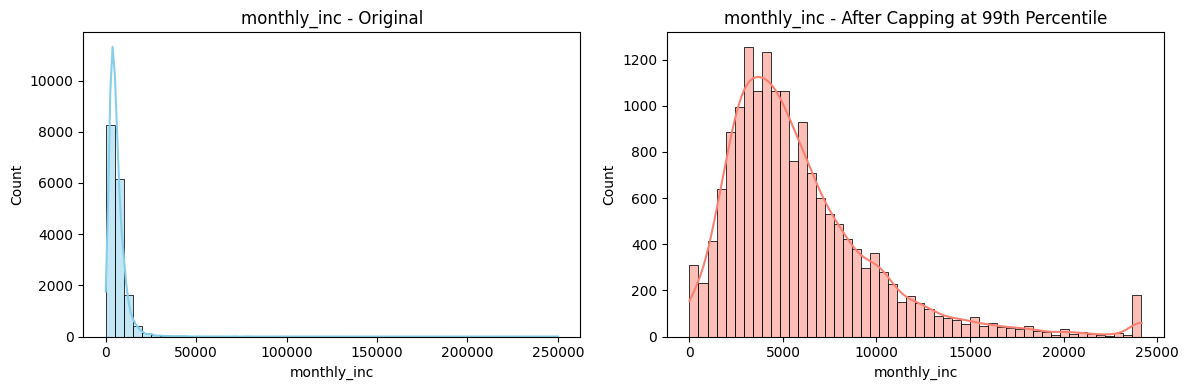

C:\Users\max3l\AppData\Local\Temp\ipykernel_169596\1923588752.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="age_group", data=df, palette="muted", legend=False)


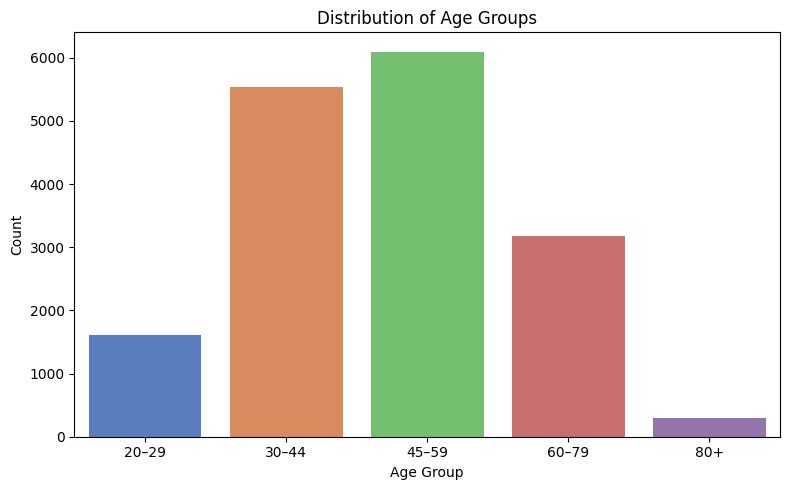

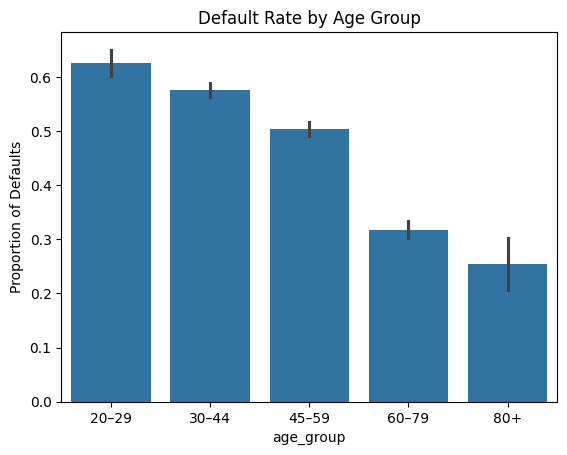

age_group
20–29    0.625622
30–44    0.576375
45–59    0.503608
60–79    0.318196
80+      0.254296
Name: dlq_2yrs, dtype: float64


C:\Users\max3l\AppData\Local\Temp\ipykernel_169596\1923588752.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rate = df.groupby("age_group")["dlq_2yrs"].mean()


In [73]:
df["total_late"] = df["late_30_59"] + df["late_60_89"] + df["late_90"]
df["late_ratio"] = df["total_late"] / df["open_credit"]
df["late_ratio"].fillna(0)

for col in ["debt_ratio", "monthly_inc"]:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Original distribution
    sns.histplot(df[col], bins=50, kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f"{col} - Original")

    # Capped distribution
    upper = df[col].quantile(0.99)
    capped = df[col].clip(upper=upper)
    sns.histplot(capped, bins=50, kde=True, ax=axes[1], color='salmon')
    axes[1].set_title(f"{col} - After Capping at 99th Percentile")

    plt.tight_layout()
    plt.show()

bins = [20, 30, 45, 60, 80, 100]
labels = ["20–29", "30–44", "45–59", "60–79", "80+"]
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels)

plt.figure(figsize=(8, 5))
sns.countplot(x="age_group", data=df, palette="muted", legend=False)
plt.title("Distribution of Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

sns.barplot(x="age_group", y="dlq_2yrs", data=df)
plt.title("Default Rate by Age Group")
plt.ylabel("Proportion of Defaults")
plt.show()

default_rate = df.groupby("age_group")["dlq_2yrs"].mean()
print(default_rate)